Accuracy: 0.9853658536585366


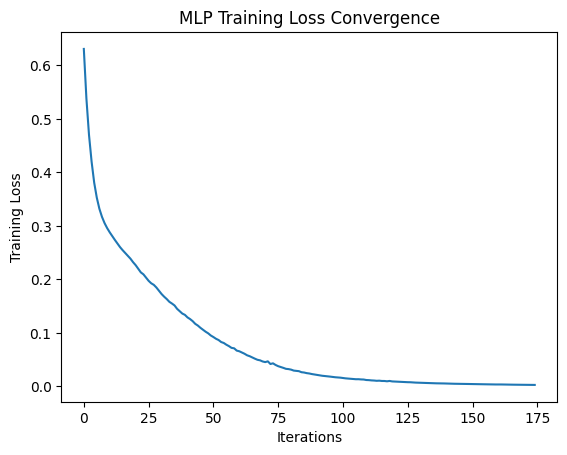

Accuracy:
 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [1]:

import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

data=pd.read_csv('/content/heart.csv')

x=data.iloc[:,:-1]
y=data.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

mlp=MLPClassifier(hidden_layer_sizes=(100,100),max_iter=1000,random_state=42)
training_loss=mlp.fit(x_train,y_train).loss_curve_

y_pred=mlp.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

plt.plot(training_loss)
plt.title('MLP Training Loss Convergence')
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()

heart_data=pd.read_csv('/content/heart.csv')
x=heart_data.drop('target',axis=1)
y=heart_data['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

mlp_classifier=MLPClassifier(hidden_layer_sizes=(64,),max_iter=1000,random_state=42)
mlp_classifier.fit(x_train_scaled,y_train)

y_pred=mlp_classifier.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

print("Accuracy:\n",accuracy)
print("Confusion Matrix:\n",conf_matrix)
print("Classification Report:\n",classification_rep)